### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Read the datasets

In [2]:
df1=pd.read_csv('student-mat.csv', sep=';')
df2=pd.read_csv('student-por.csv', sep=';')

In [3]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
df2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [10]:
df1['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [11]:
df1[['school','G3']].groupby(df1['school'],as_index=True).mean()

,G3
school,
GP,10.489971
MS,9.847826


In [12]:
df1[['school','G3']].groupby(df1['school'],as_index=True).std()

,G3
school,
GP,4.625397
MS,4.237229


 Both schools have very similar Std. Despite having a higher mean grade, GP School also have a higher std.\
 This means some students may fail in maths.

In [13]:
df2['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [14]:
df2[['school','G3']].groupby(df2['school'],as_index=True).mean()

,G3
school,
GP,12.576832
MS,10.650442


In [15]:
df2[['school','G3']].groupby(df2['school'],as_index=True).std()

,G3
school,
GP,2.625636
MS,3.833991


In Portuguese, students have a higher mean grade and a smaller standart deviation. This means less students to fail in potuguese.

### Visualization

#### School

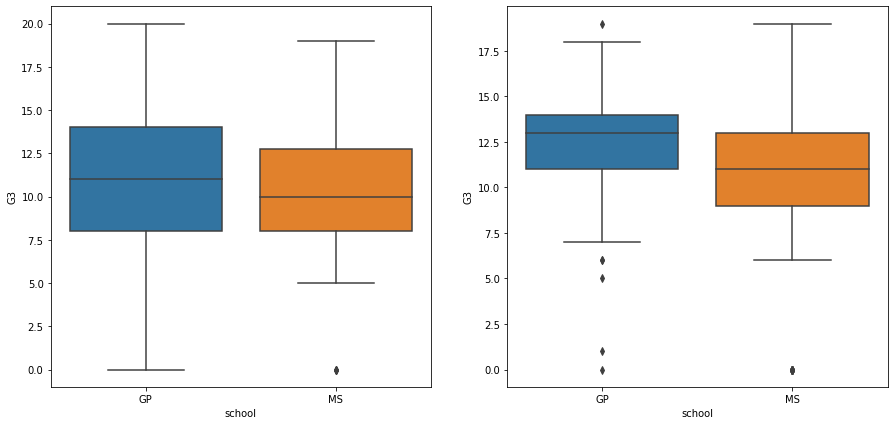

In [16]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="school",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="school",y="G3", data=df2)
plt.show()

#### Sex

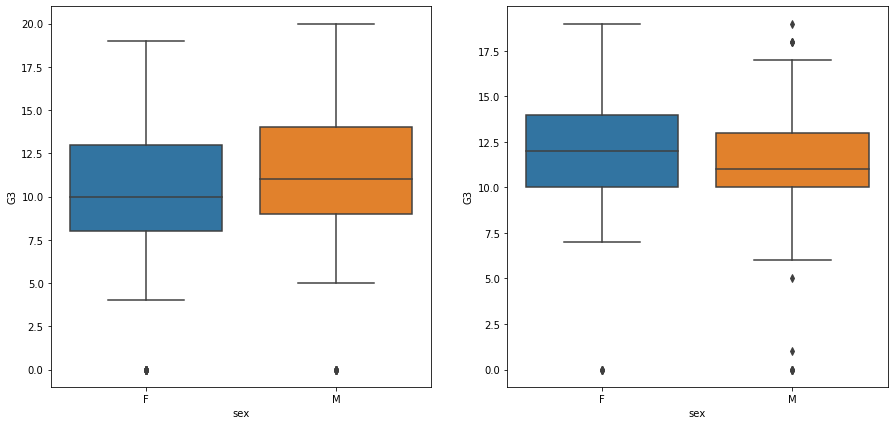

In [17]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="sex",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="sex",y="G3", data=df2)
plt.show()

Females tend to perform better in Portuguse, while Males tend to perform better in Maths.

#### Address

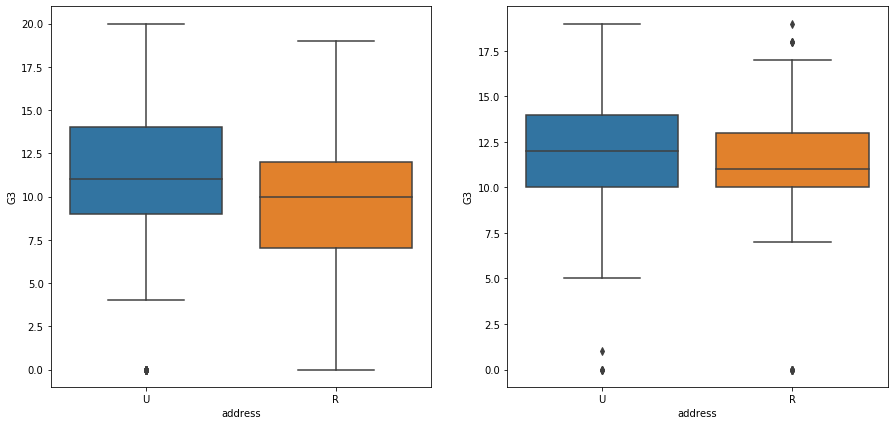

In [18]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="address",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="address",y="G3", data=df2)
plt.show()

Urban students tend to perform better in both subjects.

#### Parental status

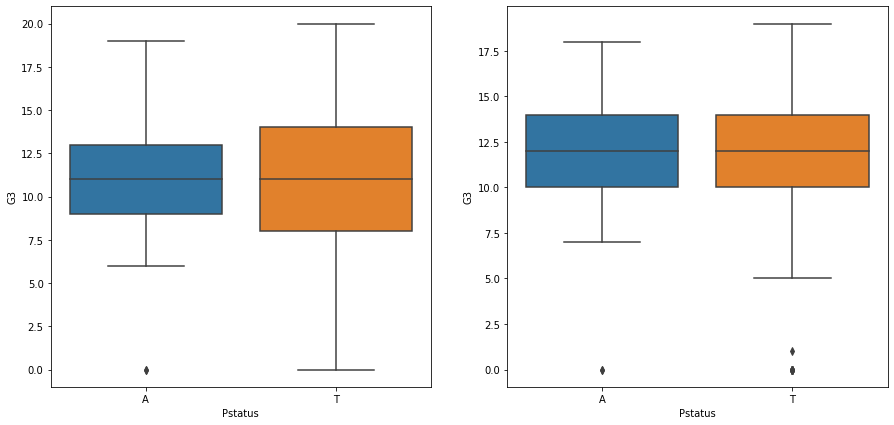

In [19]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="Pstatus",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="Pstatus",y="G3", data=df2)
plt.show()

Both have same median value. So, it may not affect the model performance.

#### Mother's education

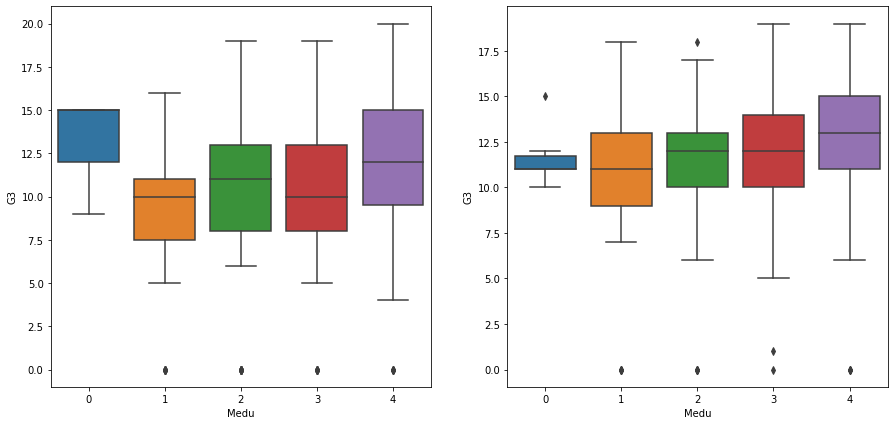

In [20]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="Medu",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="Medu",y="G3", data=df2)
plt.show()

It seems like Mother's education and student grade increases linearly.

#### Study time

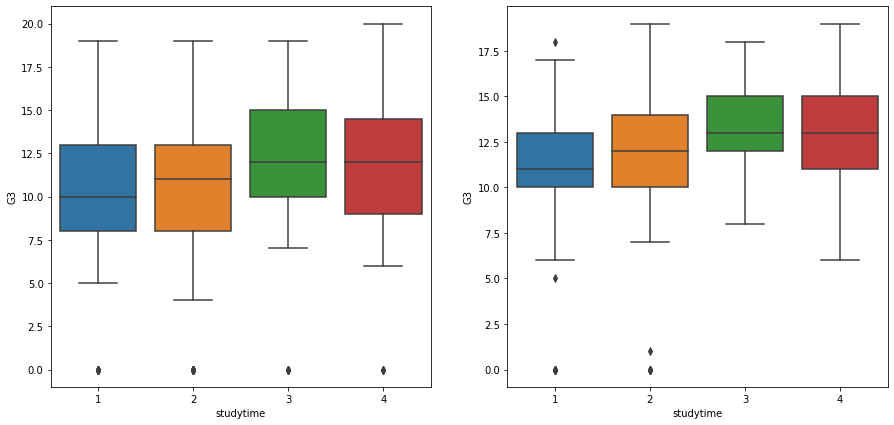

In [21]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="studytime",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="studytime",y="G3", data=df2)
plt.show()

Greater the study time, more is the grade.

#### Failures

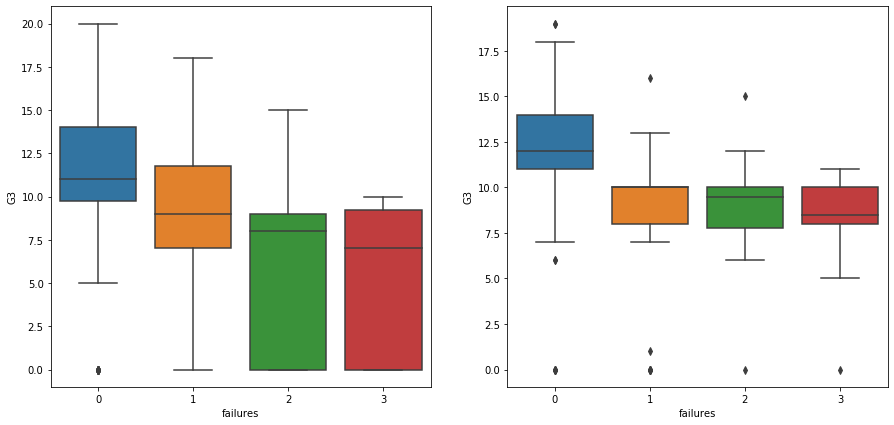

In [22]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="failures",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="failures",y="G3", data=df2)
plt.show()

The less the student fails, the bigger the grade.

#### School support

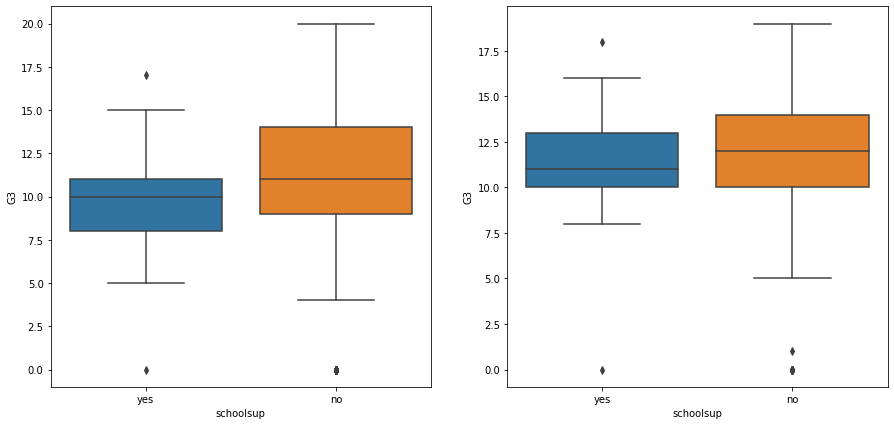

In [23]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="schoolsup",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="schoolsup",y="G3", data=df2)
plt.show()

Schools need to be more supportive for students with low grade.

### Family support

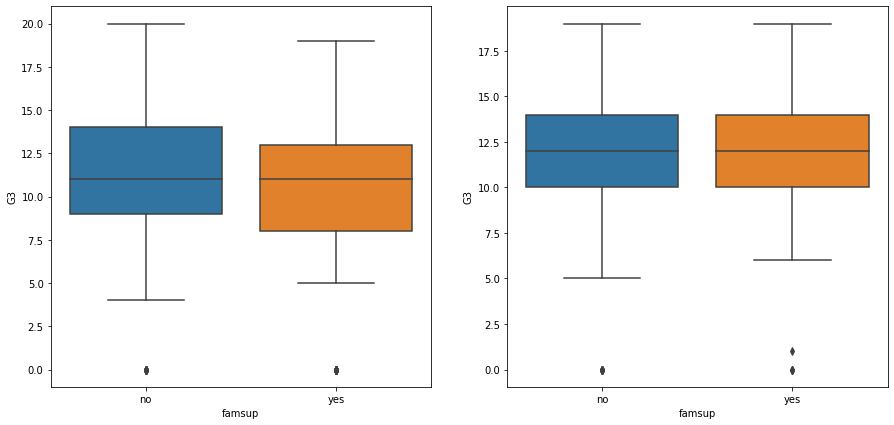

In [24]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="famsup",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="famsup",y="G3", data=df2)
plt.show()

There is not much difference in student grade depending on family support.

#### Extra activities

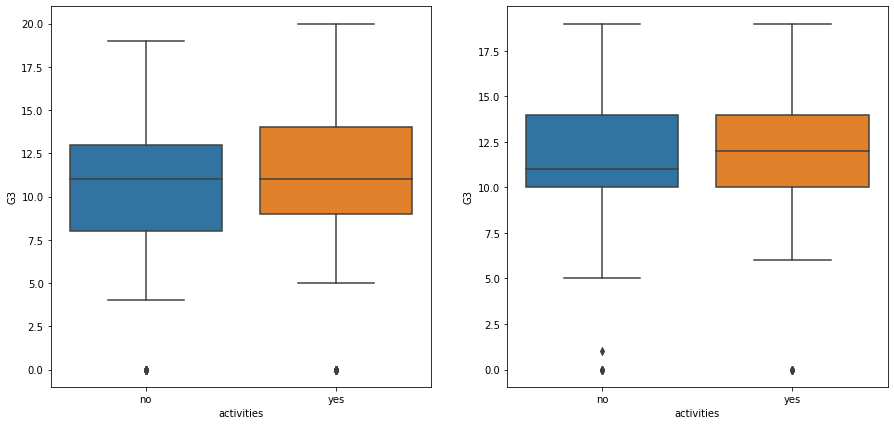

In [25]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="activities",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="activities",y="G3", data=df2)
plt.show()

There is not much difference in student grade depending on extra activities in Maths, but it has a significant difference in Portugese.

#### Nursery

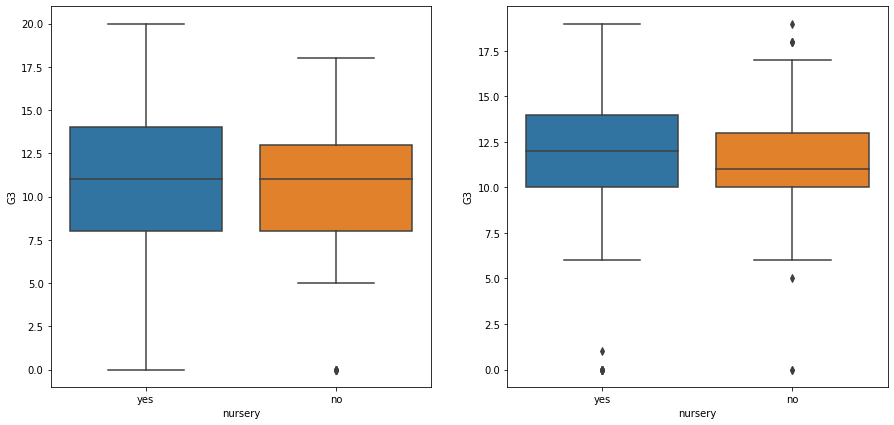

In [26]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="nursery",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="nursery",y="G3", data=df2)
plt.show()

There is not much difference in student grade depending on nursery in Maths, but it has a significant difference in Portugese.

#### Higher education

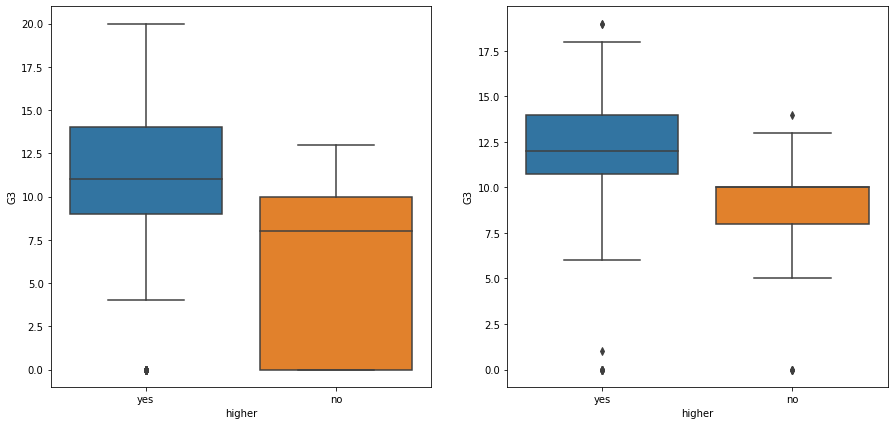

In [27]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="higher",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="higher",y="G3", data=df2)
plt.show()

Those who want higher education are oviously doing better.

#### Internet access

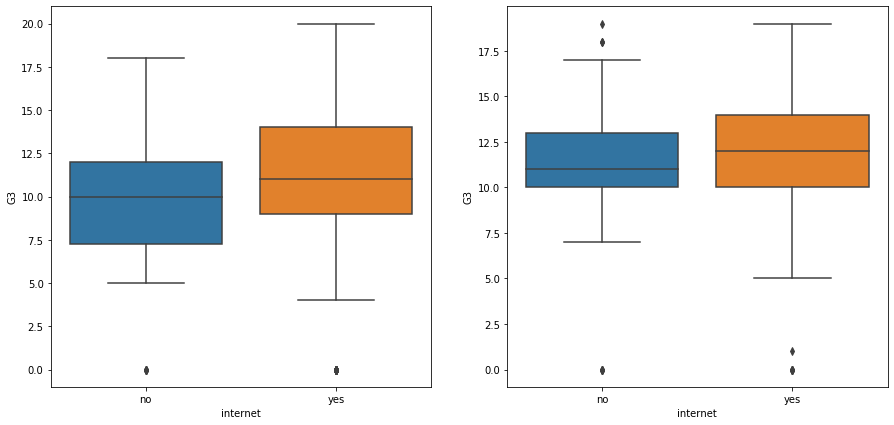

In [28]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="internet",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="internet",y="G3", data=df2)
plt.show()

Students having internet access are doing better.

#### Romantic relationship

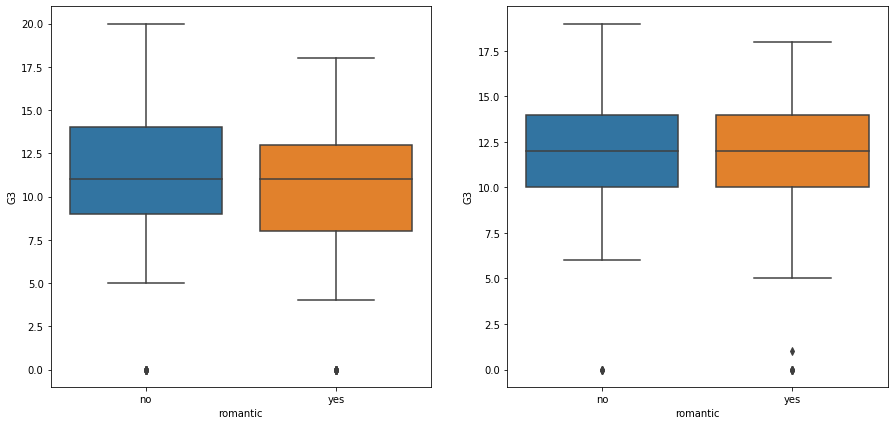

In [29]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="romantic",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="romantic",y="G3", data=df2)
plt.show()

It seems to be a myth depending on the data that students having romantic relationships doesn't do better in studies.\
There is not much difference in both the cases.

#### Time spending outside

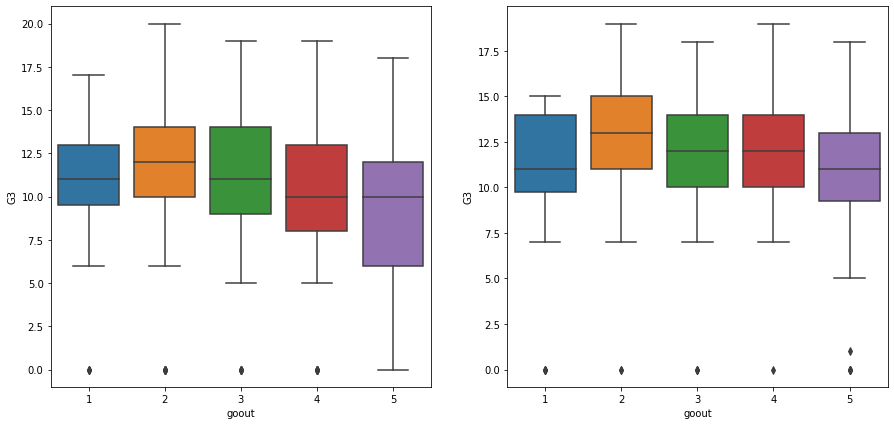

In [30]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="goout",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="goout",y="G3", data=df2)
plt.show()

Students spending more time outside, have less grade.

#### Alcohol consumption on workdays

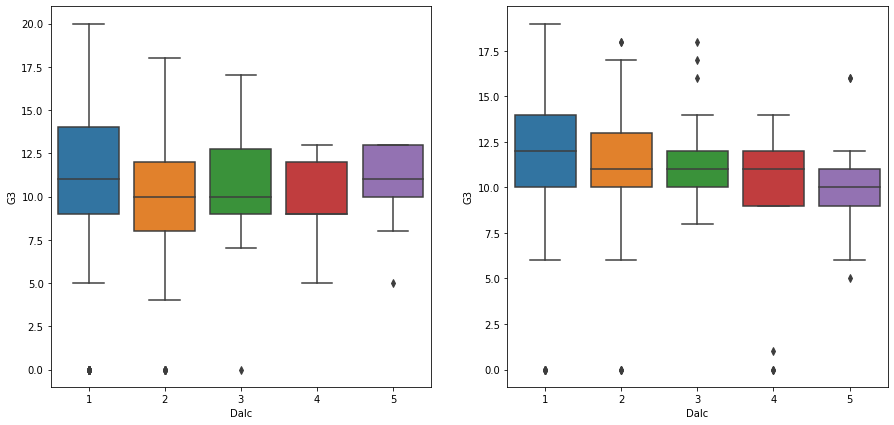

In [31]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="Dalc",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="Dalc",y="G3", data=df2)
plt.show()

In Portugese, grades are decreasing for students consuming alcohol on workdays.

#### Alcohol consumption on weekends

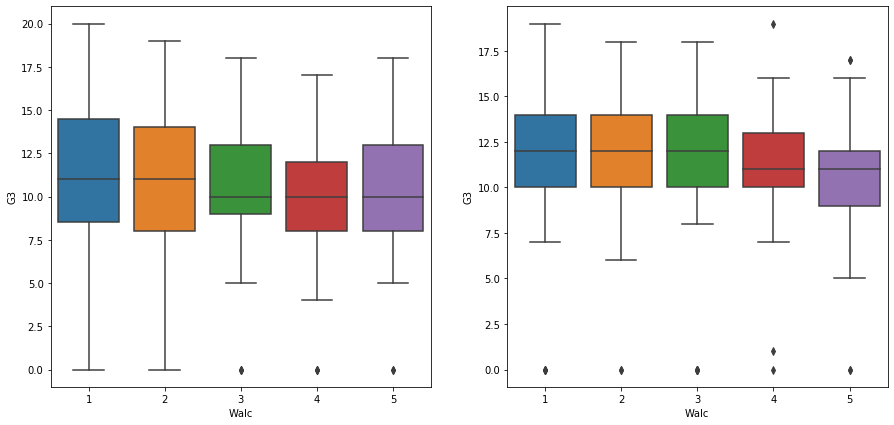

In [32]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="Walc",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="Walc",y="G3", data=df2)
plt.show()

The median grade decreases after a certain amount of alcohol consumption during the weekend.

#### Health

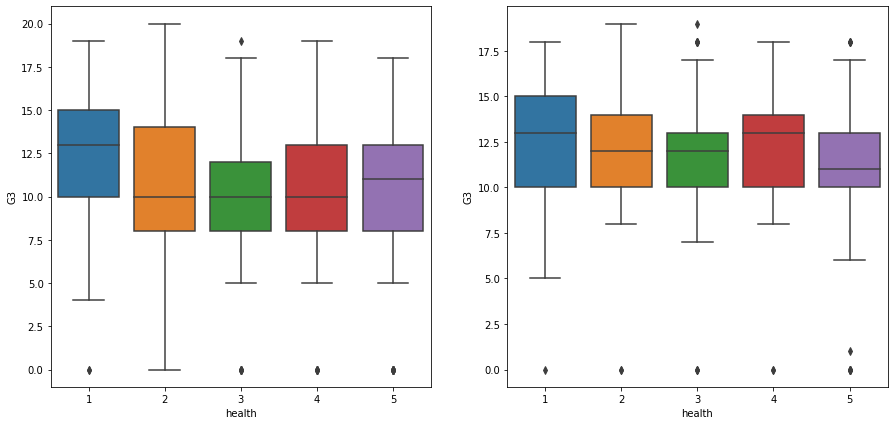

In [33]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x="health",y="G3", data=df1)
plt.subplot(1,2,2)
sns.boxplot(x="health",y="G3", data=df2)
plt.show()

Students with very bad health status seems to have a higher grade.

#### Absences

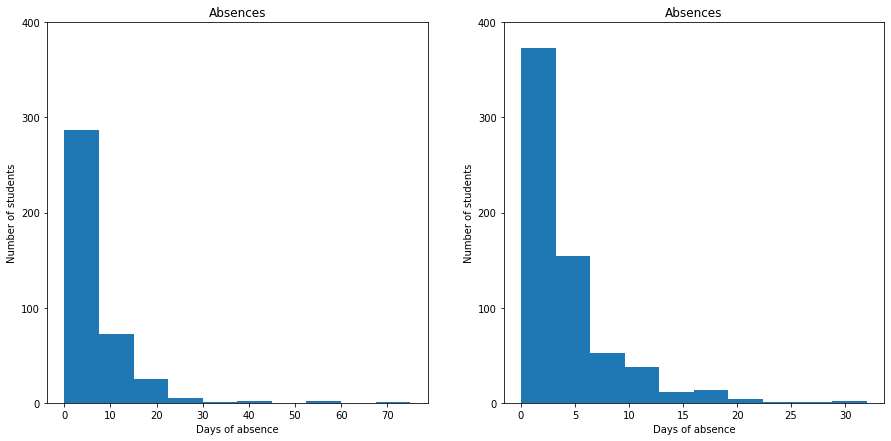

In [34]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.hist(df1['absences'])
plt.title('Absences')
plt.xlabel('Days of absence')
plt.ylabel('Number of students')
plt.yticks([0, 100, 200, 300, 400])
plt.subplot(1,2,2)
plt.hist(df2['absences'])
plt.title('Absences')
plt.xlabel('Days of absence')
plt.ylabel('Number of students')
plt.yticks([0, 100, 200, 300, 400])
plt.show()

In [35]:
Avg_Absence1 = np.average(df1['absences'])
print(round(Avg_Absence1, 2))

5.71


In [36]:
Avg_Absence2 = np.average(df2['absences'])
print(round(Avg_Absence2, 2))

3.66


Average absence is higher in Maths as compared to Portugese

#### Heat Map

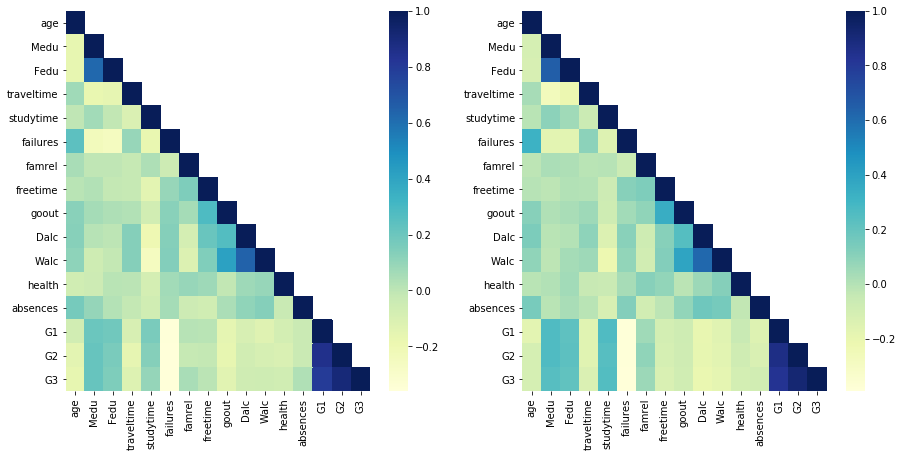

In [37]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
numeric = df1.select_dtypes(include = ['int64', 'float64'])
mask = np.array(numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(numeric.corr(), mask=mask, annot=False, cmap='YlGnBu')
plt.subplot(1,2,2)
numeric1 = df2.select_dtypes(include = ['int64', 'float64'])
mask1 = np.array(numeric1.corr())
mask1[np.tril_indices_from(mask1)]=False
sns.heatmap(numeric1.corr(), mask=mask1, annot=False, cmap='YlGnBu')
plt.show()

### Dropping the columns that do not contribute much in the model

In [38]:
df1_list=['school','famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'famrel']
df2_list=['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'romantic', 'famrel']

In [39]:
df1.drop(df1_list, axis=1, inplace=True)
df2.drop(df2_list, axis=1, inplace=True)

In [40]:
df1.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,no,3,4,1,1,3,6,5,6,6
1,F,17,U,1,1,at_home,other,course,father,1,...,yes,3,3,1,1,3,4,5,5,6
2,F,15,U,1,1,at_home,other,other,mother,1,...,yes,3,2,2,3,3,10,7,8,10
3,F,15,U,4,2,health,services,home,mother,1,...,yes,2,2,1,1,5,2,15,14,15
4,F,16,U,3,3,other,other,home,father,1,...,no,3,2,1,2,5,4,6,10,10


In [41]:
df2.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,at_home,teacher,course,mother,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,at_home,other,course,father,...,yes,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,at_home,other,other,mother,...,yes,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,health,services,home,mother,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,other,other,home,father,...,no,3,2,1,2,5,0,11,13,13


### Converting the categorical features into numerical features.

In [42]:
df1["age"] = df1.Dalc.astype("object")
df1["Dalc"] = df1.Dalc.astype("object")
df1["Medu"] = df1.Dalc.astype("object")
df1["Fedu"] = df1.Dalc.astype("object")
df1["traveltime"] = df1.Dalc.astype("object")
df1["studytime"] = df1.Dalc.astype("object")
df1["failures"] = df1.Dalc.astype("object")
df1["famrel"] = df1.Dalc.astype("object")
df1["freetime"] = df1.Dalc.astype("object")
df1["goout"] = df1.Dalc.astype("object")
df1["Walc"] = df1.Dalc.astype("object")
df1["health"] = df1.Dalc.astype("object")

In [43]:
df2["age"] = df2.Dalc.astype("object")
df2["Dalc"] = df2.Dalc.astype("object")
df2["Medu"] = df2.Dalc.astype("object")
df2["Fedu"] = df2.Dalc.astype("object")
df2["traveltime"] = df2.Dalc.astype("object")
df2["studytime"] = df2.Dalc.astype("object")
df2["failures"] = df2.Dalc.astype("object")
df2["famrel"] = df2.Dalc.astype("object")
df2["freetime"] = df2.Dalc.astype("object")
df2["goout"] = df2.Dalc.astype("object")
df2["Walc"] = df2.Dalc.astype("object")
df2["health"] = df2.Dalc.astype("object")

In [44]:
df2['school'] = df2['school'].map({'GP':1, 'MS':0})
df1['sex'] = df1['sex'].map({'M':0,'F':1})
df2['sex'] = df2['sex'].map({'M':0,'F':1})
df1['address'] = df1['address'].map({'U':1,'R':0})
df2['address'] = df2['address'].map({'U':1,'R':0})
df1['age'] = df1['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
df2['age'] = df2['age'].map({15:3, 16:3, 17:3, 18:3, 19:1, 20:3, 21:2, 22:0})
df1['Medu'] = df1['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
df2['Medu'] = df2['Medu'].map({0:0, 1:0, 2:1, 3:1, 4:2})
df1['Fedu'] = df1['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
df2['Fedu'] = df2['Fedu'].map({0:0, 1:0, 2:1, 3:1, 4:2})
df1['Mjob'] = df1['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
df2['Mjob'] = df2['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':2})
df1['Fjob'] = df1['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
df2['Fjob'] = df2['Fjob'].map({'at_home':0, 'health':1, 'other':1, 'services':1, 'teacher':2})
df1['reason'] = df1['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})
df2['reason'] = df2['reason'].map({'course':0, 'home':1, 'other':0, 'reputation':2})
df1['guardian'] = df1['guardian'].map({'mother':1, 'father':1, 'other':0})
df2['guardian'] = df2['guardian'].map({'mother':1, 'father':1, 'other':0})
df1['traveltime'] = df1['traveltime'].map({1:0, 2:1, 3:1, 4:1})
df2['traveltime'] = df2['traveltime'].map({1:0, 2:1, 3:1, 4:1})
df1['studytime'] = df1['studytime'].map({1:0, 2:1, 3:2, 4:2})
df2['studytime'] = df2['studytime'].map({1:0, 2:1, 3:2, 4:2})
df1['failures'] = df1['failures'].map({0:0, 1:1, 2:2, 3:2})
df1['schoolsup'] = df1['schoolsup'].map({'no':1, 'yes':0})
df2['schoolsup'] = df2['schoolsup'].map({'no':1, 'yes':0})
df2['nursery'] = df2['nursery'].map({'no':0, 'yes':1})
df1['higher'] = df1['higher'].map({'no':0, 'yes':1})
df2['higher'] = df2['higher'].map({'no':0, 'yes':1})
df1['internet'] = df1['internet'].map({'no':0, 'yes':1})
df2['internet'] = df2['internet'].map({'no':0, 'yes':1})
df1['freetime'] = df1['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
df2['freetime'] = df2['freetime'].map({1:1, 2:2, 3:1, 4:0, 5:0})
df1['goout'] = df1['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
df2['goout'] = df2['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})
df1['Dalc'] = df1['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})
df2['Dalc'] = df2['Dalc'].map({1:1, 2:1, 3:1, 4:1, 5:0})
df1['Walc'] = df1['Walc'].map({1:1, 2:1, 3:0, 4:0, 5:0})
df2['Walc'] = df2['Walc'].map({1:1, 2:1, 3:1, 4:0, 5:0})
df1['health'] = df1['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})
df2['health'] = df2['health'].map({1:3, 2:1, 3:1, 4:2, 5:0})
df1['G3'] = df1['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})
df2['G3'] = df2['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})

In [45]:
math = ['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']
port = ['school', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
y = ['G3']

In [46]:
df1[math].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    int64  
 1   address     395 non-null    int64  
 2   Medu        386 non-null    float64
 3   Fedu        386 non-null    float64
 4   Mjob        395 non-null    int64  
 5   Fjob        395 non-null    int64  
 6   reason      395 non-null    int64  
 7   guardian    395 non-null    int64  
 8   traveltime  386 non-null    float64
 9   studytime   386 non-null    float64
 10  failures    377 non-null    float64
 11  schoolsup   395 non-null    int64  
 12  higher      395 non-null    int64  
 13  internet    395 non-null    int64  
 14  freetime    395 non-null    int64  
 15  goout       395 non-null    int64  
 16  Dalc        395 non-null    int64  
 17  Walc        395 non-null    int64  
 18  health      395 non-null    int64  
 19  absences    395 non-null    i

In [47]:
df2[port].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    int64  
 1   sex         649 non-null    int64  
 2   address     649 non-null    int64  
 3   Medu        632 non-null    float64
 4   Fedu        632 non-null    float64
 5   Mjob        649 non-null    int64  
 6   Fjob        649 non-null    int64  
 7   reason      649 non-null    int64  
 8   guardian    649 non-null    int64  
 9   traveltime  632 non-null    float64
 10  studytime   632 non-null    float64
 11  failures    649 non-null    object 
 12  schoolsup   649 non-null    int64  
 13  nursery     649 non-null    int64  
 14  higher      649 non-null    int64  
 15  internet    649 non-null    int64  
 16  freetime    649 non-null    int64  
 17  goout       649 non-null    int64  
 18  Dalc        649 non-null    int64  
 19  Walc        649 non-null    i

In [48]:
df1[math].isna().sum()

sex            0
address        0
Medu           9
Fedu           9
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     9
studytime      9
failures      18
schoolsup      0
higher         0
internet       0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
dtype: int64

In [49]:
df1=df1.dropna(subset=['Medu', 'Fedu', 'traveltime', 'studytime', 'failures'], axis=0, how='all')

In [50]:
df1=df1.dropna(subset=['failures'], axis=0, how='all')

In [51]:
df2[port].isna().sum()

school         0
sex            0
address        0
Medu          17
Fedu          17
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    17
studytime     17
failures       0
schoolsup      0
nursery        0
higher         0
internet       0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
dtype: int64

In [52]:
df2=df2.dropna(subset=['Medu', 'Fedu', 'traveltime', 'studytime'], axis=0, how='all')

### Model Building

In [53]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(df1[math],df1[y], test_size=0.3, random_state=100)

In [54]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df2[port],df2[y], test_size=0.3, random_state=100)

In [55]:
Xm_train.shape, Xm_test.shape, ym_train.shape, ym_test.shape

((263, 22), (114, 22), (263, 1), (114, 1))

In [56]:
Xp_train.shape, Xp_test.shape, yp_train.shape, yp_test.shape

((442, 24), (190, 24), (442, 1), (190, 1))

In [57]:
model_math = LogisticRegression(max_iter=500)
model_port = LogisticRegression(max_iter=500)

In [58]:
model_math.fit(Xm_train, ym_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model_port.fit(Xp_train, yp_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred_math = model_math.predict(Xm_test)

In [61]:
pred_port = model_port.predict(Xp_test)

In [62]:
print(metrics.classification_report(ym_test,pred_math))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.89      0.96      0.92        77

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.90      0.89      0.89       114



In [63]:
print(metrics.classification_report(yp_test.values.ravel(),pred_port))

              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.95      0.99      0.97       164

    accuracy                           0.94       190
   macro avg       0.92      0.82      0.86       190
weighted avg       0.94      0.94      0.94       190

